# Logical S Gate

This notebook demonstrates the logical S gate with inplace Y basis measurement and gate teleportation [<cite data-footcite-t="Gidney_inplace_access_2024"></cite>].

## Construction

S gate can be implemented by gate teleportation:

- $M_{ZZ}$ measurement between the target qubit and an ancilla qubit initialized in the $|+\rangle$ state.
- Y basis measurement of the ancilla qubit.

`tqec` provides builtin functions `tqec.gallery.s_gate_teleportation` to construct it.

In [12]:
from tqec import PauliBasis
from tqec.gallery import s_gate_teleportation

graph = s_gate_teleportation(PauliBasis.Y)
graph.view_as_html()

S gate realizes $Y \rightarrow X$ and $Z \rightarrow Z$ stabilizer flows, ignoring the signs. The following correlation surface shows that the computation maps the $Y$ operator at the bottom input to the $X$ operator at the top output.

In [13]:
correlation_surfaces = graph.find_correlation_surfaces()
graph.view_as_html(
    pop_faces_at_directions=("-Y",),
    show_correlation_surface=correlation_surfaces[0],
)

## Circuit

You can download the circuit for a $d=3$ S gate circuit from [here](../media/gallery/s_gate/circuit.stim), or generate it with the code below. You can also open the circuit in [Crumble](https://algassert.com/crumble#circuit=Q(0,2)0;Q(0,4)1;Q(1,1)2;Q(1,3)3;Q(1,5)4;Q(2,0)5;Q(2,2)6;Q(2,4)7;Q(2,6)8;Q(3,1)9;Q(3,3)10;Q(3,5)11;Q(4,0)12;Q(4,2)13;Q(4,4)14;Q(5,1)15;Q(5,3)16;Q(5,5)17;Q(6,2)18;Q(6,4)19;Q(6,6)20;Q(7,1)21;Q(7,3)22;Q(7,5)23;Q(8,0)24;Q(8,2)25;Q(8,4)26;Q(9,1)27;Q(9,3)28;Q(9,5)29;Q(10,0)30;Q(10,2)31;Q(10,4)32;Q(10,6)33;Q(11,1)34;Q(11,3)35;Q(11,5)36;Q(12,0)37;Q(12,2)38;Q(12,4)39;Q(13,1)40;Q(13,3)41;Q(13,5)42;Q(14,4)43;R_14_8_6_1_11_4_3;RX_17_16_10_9_2_19_13_7_5;TICK;CX_13_16_7_11_5_9_17_14_10_6_4_1;TICK;CX_7_10_11_14_3_6;TICK;CX_19_17_13_10_7_4_5_2_16_14_11_8_9_6_3_1;TICK;CX_19_16_13_9_7_3_10_14_4_8_2_6;TICK;M_14_8_6_1;MX_19_13_7_5;DT(2,6,0)rec[-7];DT(0,4,0)rec[-5];DT(6,4,0)rec[-4];DT(4,2,0)rec[-3];DT(2,0,0)rec[-1];TICK;R_14_8_6_1;RX_19_13_7_5;TICK;CX_13_16_7_11_5_9_17_14_10_6_4_1;TICK;CX_7_10_11_14_3_6;TICK;CX_19_17_13_10_7_4_5_2_16_14_11_8_9_6_3_1;TICK;CX_19_16_13_9_7_3_10_14_4_8_2_6;TICK;M_14_8_6_1;MX_19_13_7_5;DT(4,4,1)rec[-8]_rec[-16];DT(2,6,1)rec[-7]_rec[-15];DT(2,2,1)rec[-6]_rec[-14];DT(0,4,1)rec[-5]_rec[-13];DT(6,4,1)rec[-4]_rec[-12];DT(4,2,1)rec[-3]_rec[-11];DT(2,4,1)rec[-2]_rec[-10];DT(2,0,1)rec[-1]_rec[-9];TICK;R_14_8_6_1_0;RX_19_13_12_7_5;RY_15;TICK;H_12_6_5_1_0_9_3_2;S_DAG_13_7;TICK;CY_10_6_4_1;TICK;CX_10_14_4_8_19_16_9_5_3_0;TICK;CX_16_14_11_8_19_17_6_9_1_3_2_5;CY_13_10_7_4;TICK;CX_11_14_9_12_3_6_13_15_7_10_0_2;TICK;CX_17_14_15_12_10_6_13_16_7_11_0_3;TICK;M_14_12_8_6_5;MX_19_13_7_1_0;DT(4,4,2)rec[-10]_rec[-18];DT(2,6,2)rec[-8]_rec[-17];DT(2,0,2)rec[-6]_rec[-11];DT(6,4,2)rec[-5]_rec[-14];DT(4,2,2)rec[-4]_rec[-9]_rec[-13];DT(2,4,2)rec[-3]_rec[-7]_rec[-12];DT(0,4,2)rec[-2]_rec[-15];DT(2,2,2)rec[-1]_rec[-16];TICK;RX_0_6_7_8_12_13_14_18_19_20_21_22_23_24_25_26_27_28_29_31_32_33_34_35_36_37_38_39_40_41_42_43;TICK;CX_7_3_13_9_19_16_25_21_32_28_38_34_43_41;CZ_2_6_4_8_10_14_15_18_17_20_22_26_27_31_29_33_35_39;TICK;CX_0_2;CZ_6_9_8_11_14_16_18_21_20_23_26_28_31_34_33_36_39_41;TICK;CX_7_4_13_10_19_17_25_22_32_29_38_35_43_42;CZ_3_6_9_12_11_14_16_18_21_24_23_26_28_31_34_37_36_39;TICK;CX_7_10_13_15_19_22_25_27_32_35_38_40;TICK;CX_0_3_7_11_13_16_19_23_25_28_32_36_38_41;CZ_6_10_12_15_14_17_18_22_24_27_26_29_31_35_37_40_39_42;TICK;MX_0_6_7_8_12_13_14_18_19_20_24_25_26_31_32_33_37_38_39_43;DT(0,2,3)rec[-20]_rec[-21];DT(2,2,3)rec[-19]_rec[-26]_rec[-27];DT(2,4,3)rec[-18]_rec[-22]_rec[-23];DT(2,6,3)rec[-17]_rec[-28];DT(4,0,3)rec[-16]_rec[-29];DT(4,2,3)rec[-15]_rec[-24];DT(4,4,3)rec[-14]_rec[-30];DT(6,4,3)rec[-12]_rec[-25];DT(8,2,3)rec[-9];DT(10,4,3)rec[-6];DT(12,2,3)rec[-3];DT(14,4,3)rec[-1];TICK;TICK;RX_0_6_7_8_12_13_14_18_19_20_24_25_26_31_32_33_37_38_39_43;TICK;CX_7_3_13_9_19_16_25_21_32_28_38_34_43_41;CZ_2_6_4_8_10_14_15_18_17_20_22_26_27_31_29_33_35_39;TICK;CX_0_2;CZ_6_9_8_11_14_16_18_21_20_23_26_28_31_34_33_36_39_41;TICK;CX_7_4_13_10_19_17_25_22_32_29_38_35_43_42;CZ_3_6_9_12_11_14_16_18_21_24_23_26_28_31_34_37_36_39;TICK;CX_7_10_13_15_19_22_25_27_32_35_38_40;TICK;CX_0_3_7_11_13_16_19_23_25_28_32_36_38_41;CZ_6_10_12_15_14_17_18_22_24_27_26_29_31_35_37_40_39_42;TICK;MX_0_6_7_8_12_13_14_18_19_20_24_25_26_31_32_33_37_38_39_43;DT(0,2,4)rec[-20]_rec[-40];DT(2,2,4)rec[-19]_rec[-39];DT(2,4,4)rec[-18]_rec[-38];DT(2,6,4)rec[-17]_rec[-37];DT(4,0,4)rec[-16]_rec[-36];DT(4,2,4)rec[-15]_rec[-35];DT(4,4,4)rec[-14]_rec[-34];DT(6,2,4)rec[-13]_rec[-33];DT(6,4,4)rec[-12]_rec[-32];DT(6,6,4)rec[-11]_rec[-31];DT(8,0,4)rec[-10]_rec[-30];DT(8,2,4)rec[-9]_rec[-29];DT(8,4,4)rec[-8]_rec[-28];DT(10,2,4)rec[-7]_rec[-27];DT(10,4,4)rec[-6]_rec[-26];DT(10,6,4)rec[-5]_rec[-25];DT(12,0,4)rec[-4]_rec[-24];DT(12,2,4)rec[-3]_rec[-23];DT(12,4,4)rec[-2]_rec[-22];DT(14,4,4)rec[-1]_rec[-21];TICK;RX_0_6_7_8_12_13_14_18_19_20_24_25_26_31_32_33_37_38_39_43;TICK;CX_7_3_13_9_19_16_25_21_32_28_38_34_43_41;CZ_2_6_4_8_10_14_15_18_17_20_22_26_27_31_29_33_35_39;TICK;CX_0_2;CZ_6_9_8_11_14_16_18_21_20_23_26_28_31_34_33_36_39_41;TICK;CX_7_4_13_10_19_17_25_22_32_29_38_35_43_42;CZ_3_6_9_12_11_14_16_18_21_24_23_26_28_31_34_37_36_39;TICK;CX_7_10_13_15_19_22_25_27_32_35_38_40;TICK;CX_0_3_7_11_13_16_19_23_25_28_32_36_38_41;CZ_6_10_12_15_14_17_18_22_24_27_26_29_31_35_37_40_39_42;TICK;MX_0_6_7_8_12_13_14_18_19_20_21_22_23_24_25_26_31_32_33_37_38_39_43;DT(0,2,5)rec[-23]_rec[-43];DT(2,2,5)rec[-22]_rec[-42];DT(2,4,5)rec[-21]_rec[-41];DT(2,6,5)rec[-20]_rec[-40];DT(4,0,5)rec[-19]_rec[-39];DT(4,2,5)rec[-18]_rec[-38];DT(4,4,5)rec[-17]_rec[-37];DT(6,2,5)rec[-16]_rec[-36];DT(6,4,5)rec[-15]_rec[-35];DT(6,6,5)rec[-14]_rec[-34];DT(8,0,5)rec[-10]_rec[-33];DT(8,2,5)rec[-9]_rec[-32];DT(8,4,5)rec[-8]_rec[-31];DT(10,2,5)rec[-7]_rec[-30];DT(10,4,5)rec[-6]_rec[-29];DT(10,6,5)rec[-5]_rec[-28];DT(12,0,5)rec[-4]_rec[-27];DT(12,2,5)rec[-3]_rec[-26];DT(12,4,5)rec[-2]_rec[-25];DT(14,4,5)rec[-1]_rec[-24];TICK;R_30_31_33_37_39;RX_0_6_7_8_12_13_14_19_25_26_32_38_43;TICK;CX_7_3_13_9_19_16_25_28_32_36_35_31_38_41_40_37_42_39;CZ_2_6_4_8_10_14;TICK;CX_0_2_25_27_28_31_32_35_34_37_36_39_38_40;CZ_6_9_8_11_14_16;TICK;CX_7_4_13_10_19_17_26_28_27_30_31_34_36_33_41_39_43_42;CY_32_29_38_35;CZ_3_6_9_12_11_14;TICK;CX_7_10_13_15_28_25_29_33_34_30_35_39_43_41;TICK;CX_0_3_7_11_13_16;CY_29_26_35_31;CZ_6_10_12_15_14_17;TICK;H_25_26_27_28_30_31_34_37;S_32_38;TICK;M_25_26_31_33_39;MX_0_6_7_8_12_13_14_19_30_32_37_38_43;MY_40;DT(7,1,6)rec[-19]_rec[-28]_rec[-31]_rec[-32];DT(10,6,6)rec[-16]_rec[-24];DT(12,4,6)rec[-15]_rec[-21];DT(0,2,6)rec[-14]_rec[-42];DT(2,2,6)rec[-13]_rec[-41];DT(2,4,6)rec[-12]_rec[-40];DT(2,6,6)rec[-11]_rec[-39];DT(4,0,6)rec[-10]_rec[-38];DT(4,2,6)rec[-9]_rec[-37];DT(4,4,6)rec[-8]_rec[-36];DT(6,4,6)rec[-7]_rec[-30]_rec[-31]_rec[-34];DT(10,2,6)rec[-6]_rec[-26];DT(10,4,6)rec[-5]_rec[-18]_rec[-25];DT(12,0,6)rec[-4]_rec[-23];DT(12,2,6)rec[-3]_rec[-17]_rec[-22];DT(14,4,6)rec[-2]_rec[-20];TICK;TICK;R_26_31_33_39;RX_0_6_7_8_12_13_14_19_30_32_38_43;TICK;CX_7_3_13_9_19_16_27_31_29_33_32_28_35_39_38_34_43_41;CZ_2_6_4_8_10_14;TICK;CX_0_2_28_26_30_27_32_29_34_31_36_33_38_35_41_39_43_42;CZ_6_9_8_11_14_16;TICK;CX_7_4_13_10_19_17_28_31_32_35_36_39;CZ_3_6_9_12_11_14;TICK;CX_7_10_13_15_29_26_30_34_32_36_35_31_38_41_42_39;TICK;CX_0_3_7_11_13_16;CZ_6_10_12_15_14_17;TICK;M_26_31_33_39;MX_0_6_7_8_12_13_14_19_30_32_38_43;DT(8,2,7)rec[-16]_rec[-34]_rec[-35];DT(10,2,7)rec[-15]_rec[-33];DT(10,6,7)rec[-14]_rec[-32];DT(12,4,7)rec[-13]_rec[-31];DT(0,2,7)rec[-12]_rec[-30];DT(2,2,7)rec[-11]_rec[-29];DT(2,4,7)rec[-10]_rec[-28];DT(2,6,7)rec[-9]_rec[-27];DT(4,0,7)rec[-8]_rec[-26];DT(4,2,7)rec[-7]_rec[-25];DT(4,4,7)rec[-6]_rec[-24];DT(6,4,7)rec[-5]_rec[-23];DT(10,0,7)rec[-4]_rec[-22];DT(10,4,7)rec[-3]_rec[-21]_rec[-33]_rec[-34];DT(12,0,7)rec[-2]_rec[-17]_rec[-19]_rec[-20]_rec[-33];DT(14,4,7)rec[-1]_rec[-18];TICK;R_26_31_33_39;RX_0_6_7_8_12_13_14_19_30_32_38_43;TICK;CX_7_3_13_9_19_16_27_31_29_33_32_28_35_39_38_34_43_41;CZ_2_6_4_8_10_14;TICK;CX_0_2_28_26_30_27_32_29_34_31_36_33_38_35_41_39_43_42;CZ_6_9_8_11_14_16;TICK;CX_7_4_13_10_19_17_28_31_32_35_36_39;CZ_3_6_9_12_11_14;TICK;CX_7_10_13_15_29_26_30_34_32_36_35_31_38_41_42_39;TICK;CX_0_3_7_11_13_16;CZ_6_10_12_15_14_17;TICK;M_28_29_36_26_31_33_39;MX_0_2_3_4_6_7_8_9_10_11_12_13_14_15_16_17_19_30_32_38_43_27_34_35_41_42;DT(8,4,8)rec[-30]_rec[-49];DT(9,3,8)rec[-30]_rec[-32]_rec[-33];DT(10,2,8)rec[-29]_rec[-48];DT(10,6,8)rec[-28]_rec[-47];DT(9,5,8)rec[-28]_rec[-31]_rec[-32];DT(12,4,8)rec[-27]_rec[-46];DT(0,2,8)rec[-26]_rec[-45];DT(1,1,8)rec[-24]_rec[-25]_rec[-26];DT(2,2,8)rec[-22]_rec[-44];DT(2,4,8)rec[-21]_rec[-43];DT(2,6,8)rec[-20]_rec[-42];DT(1,3,8)rec[-17]_rec[-18]_rec[-21]_rec[-23]_rec[-24];DT(4,0,8)rec[-16]_rec[-41];DT(4,2,8)rec[-15]_rec[-40];DT(4,4,8)rec[-14]_rec[-39];DT(3,1,8)rec[-12]_rec[-13]_rec[-15]_rec[-18]_rec[-19];DT(5,3,8)rec[-10]_rec[-11]_rec[-12];DT(6,4,8)rec[-10]_rec[-38];DT(10,0,8)rec[-9]_rec[-37];DT(10,4,8)rec[-8]_rec[-36];DT(12,2,8)rec[-7]_rec[-35];DT(14,4,8)rec[-6]_rec[-34];DT(9,1,8)rec[-4]_rec[-5]_rec[-9];DT(11,1,8)rec[-2]_rec[-3]_rec[-4]_rec[-7];DT(13,3,8)rec[-1]_rec[-2]_rec[-6];OI(0)rec[-12]_rec[-18]_rec[-24]_rec[-50]_rec[-52]_rec[-53]_rec[-65]_rec[-67]_rec[-80]_rec[-116]_rec[-118]_rec[-119]_rec[-121]_rec[-122]_rec[-124]_rec[-125]_rec[-127]_rec[-133]_rec[-135]_rec[-139]_rec[-140]).

In [14]:
from tqec import NoiseModel, compile_block_graph

compiled_graph = compile_block_graph(graph)
circuit = compiled_graph.generate_stim_circuit(
    k=1, noise_model=NoiseModel.uniform_depolarizing(p=0.001)
)

## Simulation

Here we show the simulation results of $Y \rightarrow X$ and $Z \rightarrow Z$ stabilizer flows under **uniform depolarizing** noise mode.

<details><summary><strong>Click to show the full code used for simulation</strong></summary>

```py
from multiprocessing import cpu_count
from pathlib import Path

import matplotlib.pyplot as plt
import numpy
import sinter

from tqec import NoiseModel
from tqec.gallery.s_gate_teleportation import s_gate_teleportation
from tqec.simulation.plotting.inset import plot_observable_as_inset
from tqec.simulation.simulation import start_simulation_using_sinter
from tqec.utils.enums import PauliBasis

SAVE_DIR = Path("results")


def generate_graphs(in_observable_basis: PauliBasis) -> None:
    block_graph = s_gate_teleportation(in_observable_basis)
    zx_graph = block_graph.to_zx_graph()

    correlation_surfaces = block_graph.find_correlation_surfaces()

    stats = start_simulation_using_sinter(
        block_graph,
        range(1, 4),
        list(numpy.logspace(-4, -1, 10)),
        NoiseModel.uniform_depolarizing,
        manhattan_radius=2,
        observables=correlation_surfaces,
        num_workers=cpu_count(),
        max_shots=1_000_000,
        max_errors=5_000,
        decoders=["pymatching"],
        # note that save_resume_filepath and database_path can help reduce the time taken
        # by the simulation after the database and result statistics have been saved to
        # the chosen path
        save_resume_filepath=Path(
            f"../_examples_database/s_gate_stats_{in_observable_basis.value}.csv"
        ),
        database_path=Path("../_examples_database/database.pkl"),
    )

    for i, stat in enumerate(stats):
        fig, ax = plt.subplots()
        sinter.plot_error_rate(
            ax=ax,
            stats=stat,
            x_func=lambda stat: stat.json_metadata["p"],
            failure_units_per_shot_func=lambda stat: stat.json_metadata["d"],
            group_func=lambda stat: stat.json_metadata["d"],
        )
        plot_observable_as_inset(ax, zx_graph, correlation_surfaces[i])
        ax.grid(axis="both")
        ax.legend()
        ax.loglog()
        ax.set_title("Logical S Gate Error Rate")
        ax.set_xlabel("Physical Error Rate")
        ax.set_ylabel("Logical Error Rate")
        fig.savefig(
            SAVE_DIR
            / f"logical_s_gate_result_input_{in_observable_basis}_operator.png"
        )


def main():
    SAVE_DIR.mkdir(exist_ok=True)
    generate_graphs(PauliBasis.Z)
    generate_graphs(PauliBasis.X)


if __name__ == "__main__":
    main()

```

</details>

In [15]:
from multiprocessing import cpu_count
from pathlib import Path

import matplotlib.pyplot as plt
import numpy
import sinter

from tqec import NoiseModel
from tqec.gallery.s_gate_teleportation import s_gate_teleportation
from tqec.simulation.plotting.inset import plot_observable_as_inset
from tqec.simulation.simulation import start_simulation_using_sinter
from tqec.utils.enums import PauliBasis


def generate_graphs(in_observable_basis: PauliBasis) -> None:
    """Generate the logical error-rate graphs corresponding to the provided basis."""
    block_graph = s_gate_teleportation(in_observable_basis)
    zx_graph = block_graph.to_zx_graph()

    correlation_surfaces = block_graph.find_correlation_surfaces()

    stats = start_simulation_using_sinter(
        block_graph,
        range(1, 4),
        list(numpy.logspace(-4, -1, 10)),
        NoiseModel.uniform_depolarizing,
        manhattan_radius=2,
        observables=correlation_surfaces,
        num_workers=cpu_count(),
        max_shots=1_000_000,
        max_errors=5_000,
        decoders=["pymatching"],
        # note that save_resume_filepath and database_path can help reduce the time taken
        # by the simulation after the database and result statistics have been saved to
        # the chosen path
        save_resume_filepath=Path(
            f"../_examples_database/s_gate_stats_{in_observable_basis.value}.csv"
        ),
        database_path=Path("../_examples_database/database.pkl"),
    )

    for i, stat in enumerate(stats):
        fig, ax = plt.subplots()
        sinter.plot_error_rate(
            ax=ax,
            stats=stat,
            x_func=lambda stat: stat.json_metadata["p"],
            failure_units_per_shot_func=lambda stat: stat.json_metadata["d"],
            group_func=lambda stat: stat.json_metadata["d"],
        )
        plot_observable_as_inset(ax, zx_graph, correlation_surfaces[i])
        ax.grid(axis="both")
        ax.legend()
        ax.loglog()
        ax.set_title("Logical S Gate Error Rate")
        ax.set_xlabel("Physical Error Rate")
        ax.set_ylabel("Logical Error Rate")

### $Y \rightarrow X$

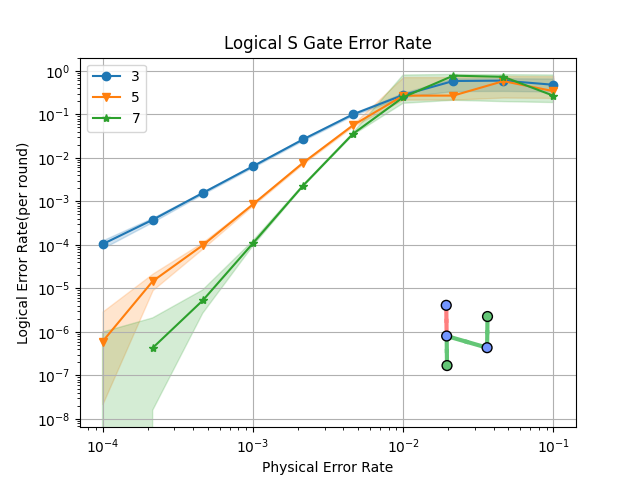

In [16]:
generate_graphs(PauliBasis.Y)

### $Z \rightarrow Z$

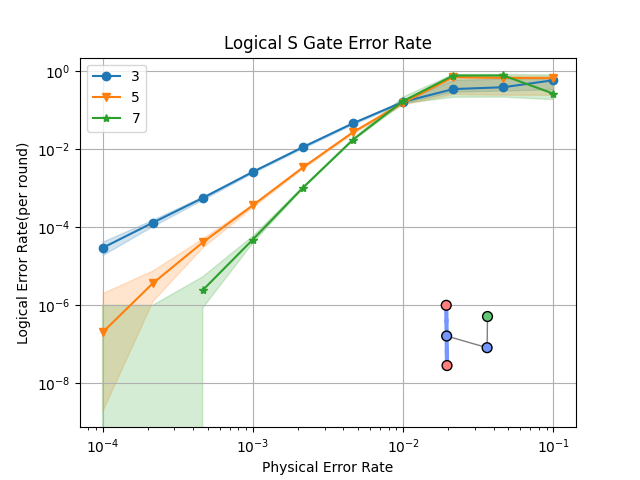

In [17]:
generate_graphs(PauliBasis.Z)

## References

.. footbibliography::